# Prepare Data

In [1]:
import re
import csv
import pandas as  pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px
import plotly.io as pio

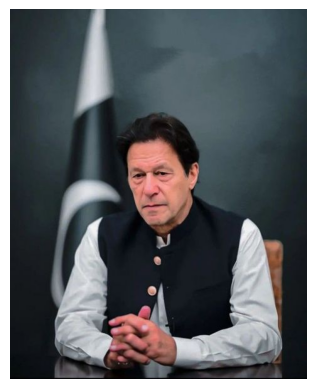

In [2]:
image = Image.open('/kaggle/input/imran-khan/e7d0bc62df1e225a5ef18b4e356cbddb.jpg')  
plt.imshow(image)
plt.axis('off') 
plt.show()

In [3]:
input_file = "/kaggle/input/imran-khans-speeches/PM Imran Khan 67 speeches.txt"
output_file = "Data_Imran_khan.csv"

In [4]:
# Date pattern to match the date in the format "YYYY-MM-DD HH:MM:SS,"
date_pattern = r'(\d{4})-\d{2}-\d{2} \d{2}:\d{2}:\d{2},'

# Reading the data from the text file
with open(input_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Opening a CSV file to write the data
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # Writing the headers
    writer.writerow(['Year', 'Category', 'Statement'])

    current_year = None
    for line in lines:
        # Attempt to extract the year from the line
        date_match = re.match(date_pattern, line)
        
        if date_match:
            current_year = date_match.group(1)  # Extract the year
        
        # Extracting the categories and statements correctly
        if '[' in line and ']' in line:
            # Extracting categories found in brackets []
            categories = re.findall(r'\[(.*?)\]', line)
            
            # Extracting the statement by removing everything inside brackets []
            statement = re.sub(r'\[.*?\]', '', line).strip()
            
            # Writing each category with its corresponding statement and year into CSV
            if current_year:  # Ensure we have a valid year
                for category in categories:
                    category = category.strip()  # Remove any extra whitespace
                    if len(category) <= 20:  # Limit the category length to 20 characters
                        writer.writerow([current_year, category, statement])

print(f"Data successfully written to {output_file}")

Data successfully written to Data_Imran_khan.csv


# First Analysis¶

In [5]:
df = pd.read_csv(output_file)

In [6]:
df.head()

,Year,Category,Statement
0,2021,general,respected foreign ministers ladies and gentlemen
1,2021,general,first of all let me welcome all of you to paki...
2,2021,development,the irony is that 41 years ago the extraordina...
3,2021,policy,it was discussing afghanistan
4,2021,governance,and since then all the troubles of afghanistan...


In [7]:
df.isnull().sum()

Year         0
Category     0
Statement    5
dtype: int64

# Clean Data

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Year         0
Category     0
Statement    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5040 entries, 0 to 5044
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       5040 non-null   int64 
 1   Category   5040 non-null   object
 2   Statement  5040 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.5+ KB


In [11]:
df.describe()

,Year
count,5040.000000
mean,2020.545437
std,1.329262
min,2018.000000
25%,2019.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


In [12]:
df["Year"].value_counts()

Year
2022    1694
2019    1035
2021     983
2020     962
2018     337
2023      29
Name: count, dtype: int64

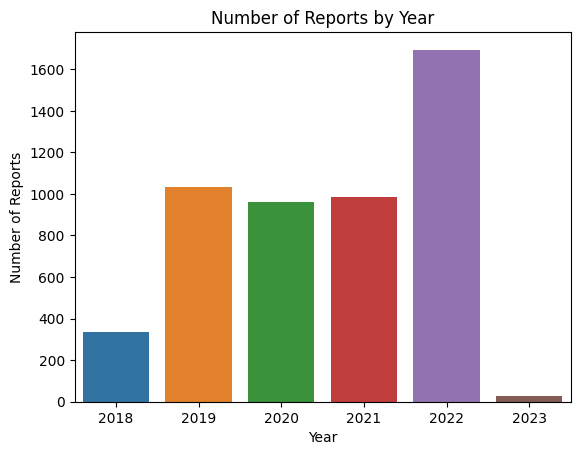

In [13]:
sns.countplot(x = "Year", data= df)
plt.title('Number of Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.show()

In [14]:
top_Category = df["Category"].value_counts().head(20)
top_Category

Category
general           1210
governance         899
development        496
corruption         410
finance            351
action             317
policy             316
people             238
welfare            167
cooperation        150
law and order      121
environment         32
army                26
praise              18
health              18
history             18
foreign policy      17
security            14
education           13
...                 12
Name: count, dtype: int64

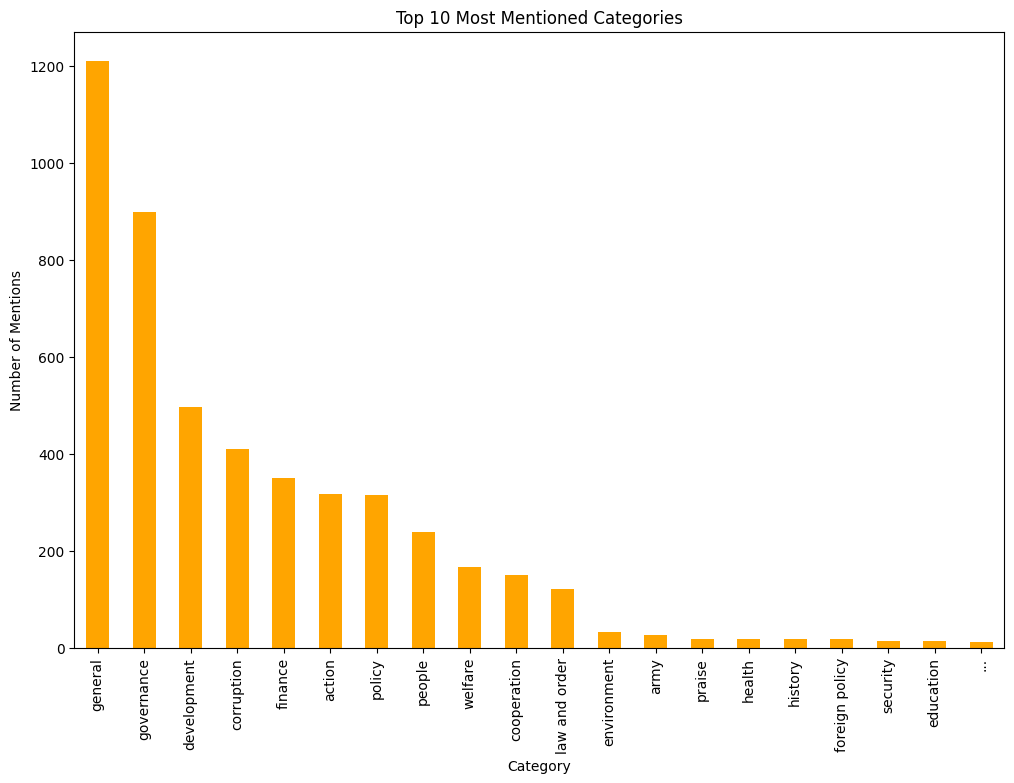

In [15]:
plt.figure(figsize = (12,8))
top_Category.plot(kind = "bar",color="orange")
plt.title('Top 10 Most Mentioned Categories')
plt.xlabel('Category')
plt.ylabel('Number of Mentions')
plt.show()


In [16]:
top_Category = df["Category"].value_counts()

to_15_Category = top_Category.head(15).index

filtered_df = df[df["Category"].isin(to_15_Category)]

filtered_df

,Year,Category,Statement
0,2021,general,respected foreign ministers ladies and gentlemen
1,2021,general,first of all let me welcome all of you to paki...
2,2021,development,the irony is that 41 years ago the extraordina...
3,2021,policy,it was discussing afghanistan
4,2021,governance,and since then all the troubles of afghanistan...
...,...,...,...
5040,2021,law and order,23. Their interpretation is that it is a byla...
5041,2021,finance,24. They will earn so much money from here an...
5042,2021,action,25. App and get it from the other side and Ba...
5043,2021,development,"26. It will help Brazil, just do it, I make m..."


In [17]:
df["Category"].unique()

array(['general', 'development', 'policy', 'governance', 'welfare',
       'corruption', 'finance', 'action', 'people', 'responsibility',
       'environment', 'cooperation', 'education', 'healthcare',
       'health, people', 'health, development', 'cooperation, action',
       'health, welfare', 'finance, health', 'governance, action',
       'welfare, people', 'health, governance', 'governance, health',
       '__', 'welfare, health', 'cooperation, people',
       'development, health', 'perpetrated', 'need to', 'law and order',
       'premier', 'and', 'Modi', 'army', 'the PPP leaders', 'security',
       'history', 'justice', '...', 'of Pakistan', 'new', 'the question',
       'it could be done', 'opposition', 'PTI', 'Nawaz and Zardari',
       'health', 'economic', 'them', 'against misuse',
       'With Urdu Subtitles', 'to any country', 'Kashmir',
       'law and order, army', 'Kashmir, policy', 'corruption, policy',
       'a', 'policy, cooperation', 'policy, corruption', 'Firs

In [18]:
top_Category = df["Category"].value_counts()

to_15_Category = top_Category.head(15).index

filtered_df = df[df["Category"].isin(to_15_Category)]

finel_df = filtered_df.reset_index(drop=True)

finel_df

,Year,Category,Statement
0,2021,general,respected foreign ministers ladies and gentlemen
1,2021,general,first of all let me welcome all of you to paki...
2,2021,development,the irony is that 41 years ago the extraordina...
3,2021,policy,it was discussing afghanistan
4,2021,governance,and since then all the troubles of afghanistan...
...,...,...,...
4764,2021,law and order,23. Their interpretation is that it is a byla...
4765,2021,finance,24. They will earn so much money from here an...
4766,2021,action,25. App and get it from the other side and Ba...
4767,2021,development,"26. It will help Brazil, just do it, I make m..."


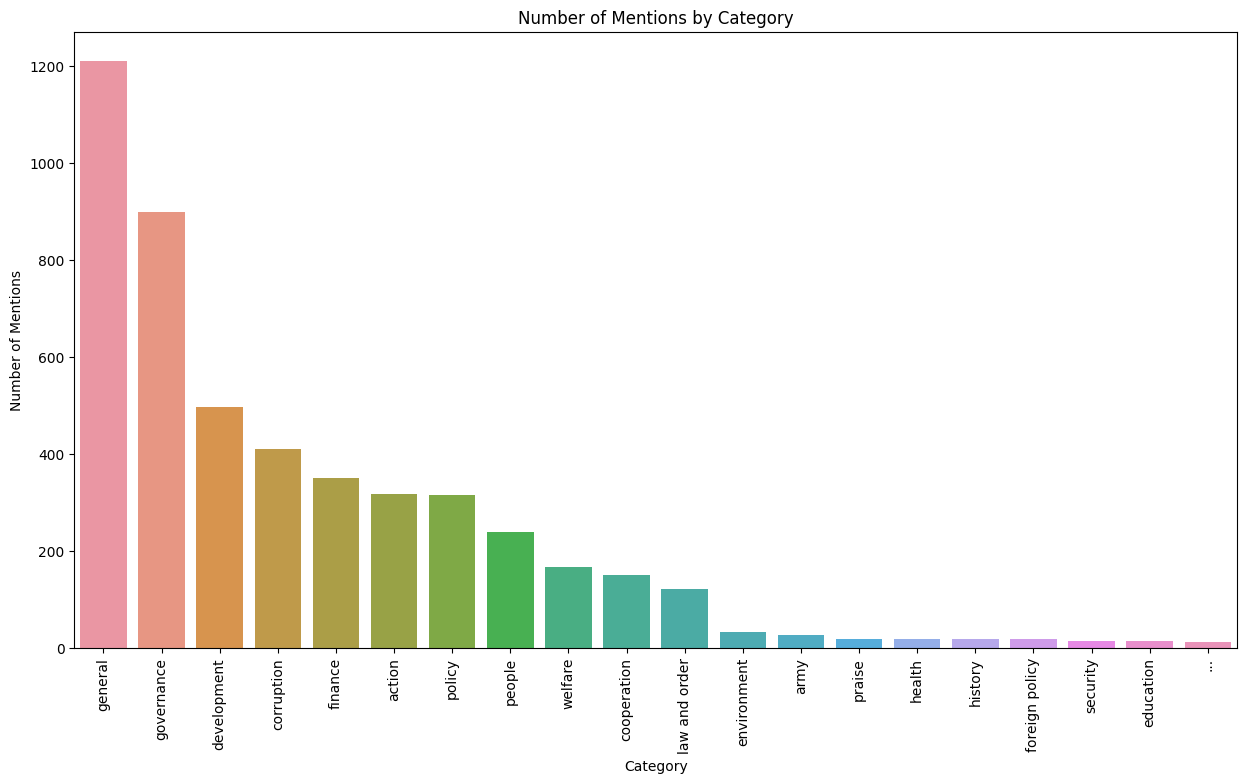

In [19]:
top_Category = df["Category"].value_counts().head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x = top_Category.index, y = top_Category.values)
plt.title('Number of Mentions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.show()

In [20]:
finel_df["Category"].unique()

array(['general', 'development', 'policy', 'governance', 'welfare',
       'corruption', 'finance', 'action', 'people', 'environment',
       'cooperation', 'law and order', 'army', 'health', 'praise'],
      dtype=object)

In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Count occurrences of each category by year
category_year_counts = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)


category_year_percentages = category_year_counts.div(category_year_counts.sum(axis=1), axis=0) * 100


category_year_percentages = category_year_percentages.reset_index()

category_year_melted = category_year_percentages.melt(id_vars='Year', var_name='Category', value_name='Percentage')


category_year_counts.reset_index(inplace=True)
category_year_melted = category_year_melted.merge(category_year_counts.melt(id_vars='Year', var_name='Category', value_name='Count'), on=['Year', 'Category'])


category_year_melted['Text'] = category_year_melted['Count'].astype(str) + ' (' + category_year_melted['Percentage'].round(2).astype(str) + '%)'

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


fig = px.bar(category_year_melted, x='Year', y='Percentage', color='Category',
             title='Percentage of Each Report Category by Year',
             labels={'Percentage': 'Percentage (%)', 'Year': 'Year'},
             text='Text',
             color_discrete_sequence=color_sequence)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Percentage (%)',
                  legend_title='Category', title_x=0.5)


fig.show()

# The End

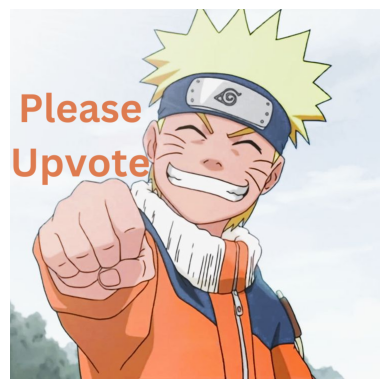

In [23]:
image = Image.open('/kaggle/input/naruto/Please Upvote.png')  
plt.imshow(image)
plt.axis('off') 
plt.show()